In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

from scripts.leitor import Leitor
from scripts.ambiente import Ambiente
from scripts.problems import MetroNew

In [35]:
%load_ext autoreload
%autoreload 2

In [2]:
config

Available objects for config:
    AliasManager
    DisplayFormatter
    HistoryManager
    IPCompleter
    IPKernelApp
    LoggingMagics
    MagicsManager
    OSMagics
    PrefilterManager
    ScriptMagics
    StoreMagics
    ZMQInteractiveShell


In [64]:
config = Leitor().loadJson('data/metroNew.json')
problem = MetroNew()
ambiente = Ambiente(config, problem)
problem.neighboors

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'] E7 E14


{'E1': ['E2'],
 'E2': ['E1', 'E3', 'E9', 'E10'],
 'E3': ['E2', 'E4', 'E9', 'E13'],
 'E4': ['E3', 'E5', 'E8', 'E13'],
 'E5': ['E4', 'E6', 'E7', 'E8'],
 'E6': ['E5'],
 'E7': ['E5'],
 'E8': ['E4', 'E5', 'E9', 'E12'],
 'E9': ['E2', 'E3', 'E8', 'E11'],
 'E10': ['E2'],
 'E11': ['E9'],
 'E12': ['E8'],
 'E13': ['E3', 'E4', 'E14'],
 'E14': ['E13']}

100%|██████████| 1000/1000 [00:03<00:00, 315.29it/s]


<Axes: >

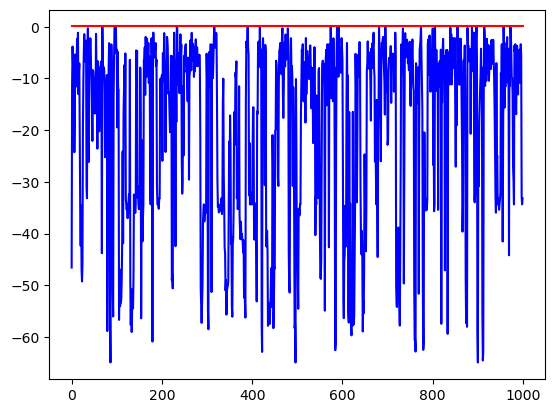

In [65]:
ambiente.run()
sns.lineplot(ambiente.results_mean,color='Blue')
sns.lineplot(ambiente.results_best,color='Red')

In [63]:
problem.penality_function(problem.decode(ambiente.elite_population[0]))

0.9550000000000001

In [59]:
problem.decode(ambiente.elite_population[0])

['E7', 'E5', 'E4', 'E13', 'E14']

In [17]:
problem.straight_distance_dataframe

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
Estacao,,,,,,,,,,,,,,
E1,0.0,10.0,18.5,24.8,36.4,38.8,35.8,25.4,17.6,9.1,16.7,27.3,27.6,29.8
E2,10.0,0.0,8.5,14.8,26.6,29.1,26.1,17.3,10.0,3.5,15.5,20.9,19.1,21.8
E3,18.5,8.5,0.0,6.3,18.2,20.6,17.6,13.6,9.4,10.3,19.5,19.1,12.1,16.6
E4,24.8,14.8,6.3,0.0,12.0,14.4,11.5,12.4,12.6,16.7,23.6,18.6,10.6,15.4
E5,36.4,26.6,18.2,12.0,0.0,3.0,2.4,19.4,23.3,28.2,34.2,24.8,14.5,17.9
E6,38.8,29.1,20.6,14.4,3.0,0.0,3.3,22.3,25.7,30.3,36.7,27.6,15.2,18.2
E7,35.8,26.1,17.6,11.5,2.4,3.3,0.0,20.0,23.0,27.3,34.2,25.7,12.4,15.6
E8,25.4,17.3,13.6,12.4,19.4,22.3,20.0,0.0,8.2,20.3,16.1,6.4,22.7,27.6
E9,17.6,10.0,9.4,12.6,23.3,25.7,23.0,8.2,0.0,13.5,11.2,10.9,21.2,26.6


In [24]:
ex = problem.decode(ambiente.population[0])
ex

['E7', 'E5', 'E6']

In [36]:
problem._straight_distance(ex[-1],problem.end)

18.2

In [ ]:
self._straight_distance(solution[-1],self.end)

In [37]:
problem._straight_distance(ex[-1],problem.end)

18.2

In [50]:
for individuo in ambiente.population:
    dec = problem.decode(individuo)
    print(1 - (problem.objective_function(dec)/problem.max_distance),problem.penality_function(dec),problem.fitness(dec))

0.3933333333333333 0.1433333333333333 0.25
-0.1200000000000001 1.0175 -1.1375000000000002
0.006666666666666599 1.8016666666666667 -1.7950000000000002
-0.1200000000000001 1.0175 -1.1375000000000002
0.29333333333333333 1.0883333333333334 -0.795
-0.1200000000000001 0.9766666666666666 -1.0966666666666667
0.3933333333333333 0.1433333333333333 0.25
0.006666666666666599 1.9141666666666666 -1.9075
0.3933333333333333 0.1433333333333333 0.25
1.0 2.2625 -1.2625000000000002
0.3933333333333333 0.1433333333333333 0.25
0.29333333333333333 2.6925 -2.3991666666666664
-0.1200000000000001 0.9766666666666666 -1.0966666666666667
0.3933333333333333 0.1433333333333333 0.25
1.0 0.9550000000000001 0.04499999999999993
-0.1200000000000001 0.9766666666666666 -1.0966666666666667
0.29333333333333333 1.6741666666666668 -1.3808333333333334
-0.1200000000000001 0.9766666666666666 -1.0966666666666667
0.3933333333333333 0.1433333333333333 0.25
0.006666666666666599 1.6333333333333333 -1.6266666666666667
-0.120000000000000